## Real estate price prediction using machine learning 

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
#to look at the first 5 datasets of data.csv
#this is done to see if csv import is workign well
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#to check for null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285026,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702520,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#to visualise matplotlib graphs on this terminal itself

%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B '}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

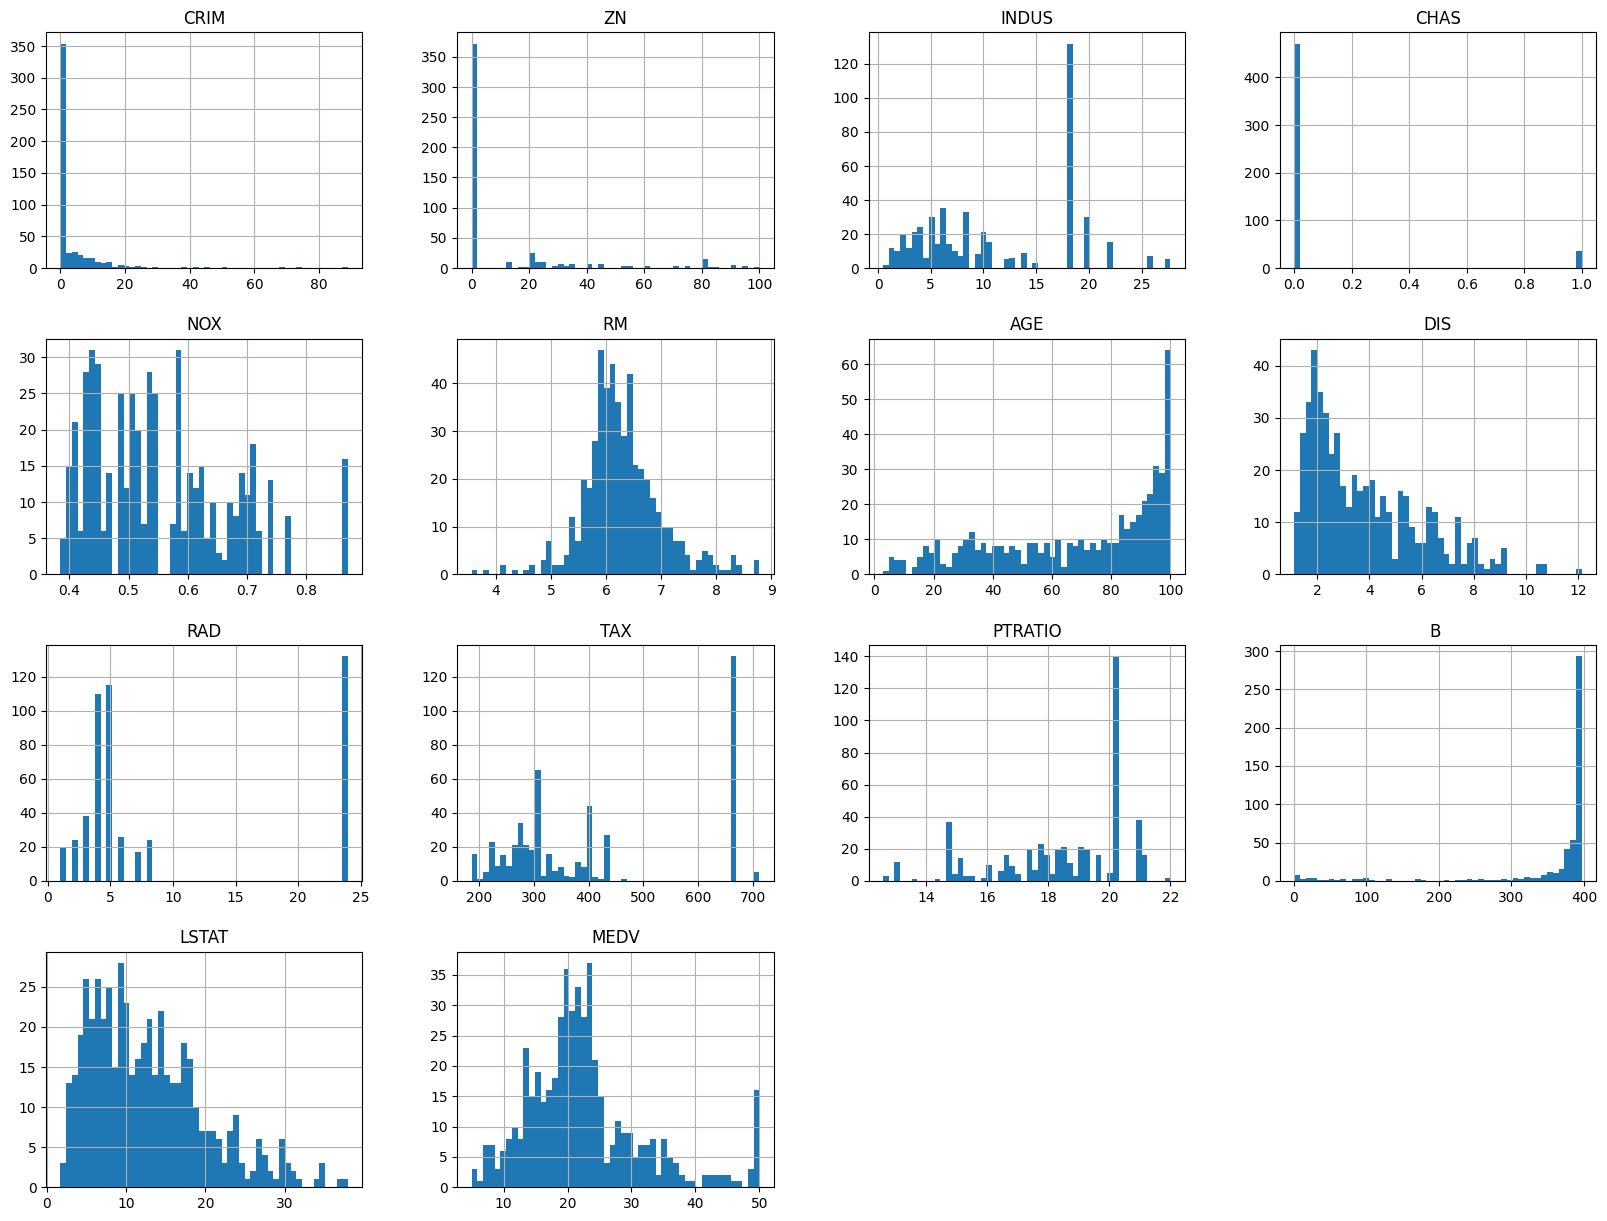

In [9]:
housing.hist(bins=50, figsize=(20,15))

# train-test splitting 
to get to data sets: one for training and one for testing 

In [10]:
#For learning purposes: 

# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     #we are doing this to fix the shuffled data, if not then everytime we re run the program at some point test data and train data might merge...and we dont want that to happen thus we need to fix the values even though we run it multiple times
#     shuffled = np.random.permutation(len(data))
#     #so the length of the data will be shuffled in random permutation using numpy
#     test_setsize = int(len(data)*test_ratio)
#     #that means the test dataset will be testratio times(eg: 20% = 0.2 times) the length of dataset(506 in this case) : 506*0.2=102
#     test_indices = shuffled[:test_setsize]
#     train_indices = shuffled[test_setsize:]
#     #that means the shuffled first 102 will be tested from 0 and from 102 to 506 will be trained
#     return data.iloc[test_indices], data.iloc[train_indices]

In [11]:
#fact is whatver we did in the above block: split_train_test function, it is already present in teh sklearn module lol. So let us now split the dataset inot train and test data using sklewrn built in function
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f'Train data set is as follows : \n{train_set}')
print(f'number of rows in test data set : {len(test_set)},\nnumber of rows in train data set : {len(train_set)}')

Train data set is as follows : 
         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  TAX  \
477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
19    0.72580   0.0   8.14     0  0.5380  5.727  69.5  3.7965    4  307   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384   

     PTRATIO      B   LSTAT  MEDV  
477     20.2  349.48  24.91  12

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
#This class is used for creating stratified samples, meaning it splits the data into training and testing sets while preserving the distribution of a specific feature (in this case, housing['CHAS']).
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#n_splits=1: This specifies the number of re-shuffling and splitting iterations. In this case, it's set to 1, meaning the data will be split once.
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
#The split.split(housing, housing['CHAS']) function is called to split the housing DataFrame.
#The split will ensure that the distribution of CHAS is the same in both the training and testing sets.
#chatgpt: Imagine the housing DataFrame has 100 rows, and the CHAS column categorizes these rows (e.g., 10% are 1, and 90% are 0). The split function divides these rows into a training set (80 rows) and a test set (20 rows) while maintaining this 10%-90% distribution in both sets.
#housing.loc[train_index] retrieves rows 0 to 79 from housing, creating strat_train_set.
#housing.loc[test_index] retrieves rows 80 to 99, creating strat_test_set.

In [13]:
#testin stratified split on CHAS
print("chas in test set")
strat_test_set['CHAS'].value_counts()

chas in test set


CHAS
0    95
1     7
Name: count, dtype: int64

In [14]:
#testin stratified split on CHAS
print("chas in train set")
strat_train_set['CHAS'].value_counts()

chas in train set


CHAS
0    376
1     28
Name: count, dtype: int64

In [15]:
housing = strat_train_set.copy()
#housing == strat_train_set 

In [16]:
housing.shape

(404, 14)

## Correlations search


In [17]:
corr_matrix = housing.corr()
#used to search for correlations
corr_matrix['MEDV'].sort_values(ascending = False)
#eska matlab yeh hai ki if we increase the value of medv then baki sab me kya effect hoga like medv jyada karu toh rm bhi increase hoga (0.6.. postive number hai) so this will be called as postive correlation while agar ham medv ko increase kare then tax(example) will decrease thus that's negative corelation. toh yeh correlation ham descending order me print kar rhe hai.

MEDV       1.000000
RM         0.680034
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='NOX', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='NOX', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='NOX'>,
        <Axes: xlabel='RM', ylabel='NOX'>,
        <Axes: xlabel='NOX', ylabel='NOX'>,
        <Axes: xlabel='LSTAT', ylabel='NOX'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='NOX', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

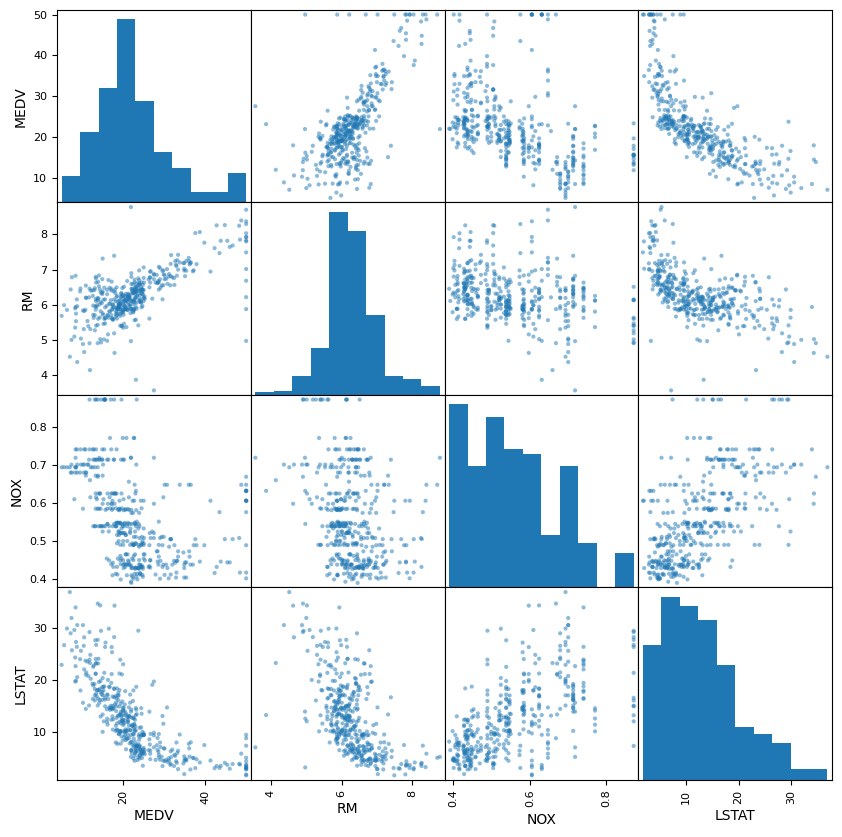

In [18]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','NOX','LSTAT']
scatter_matrix(housing[attributes], figsize=(10,10))

<Axes: xlabel='RM', ylabel='MEDV'>

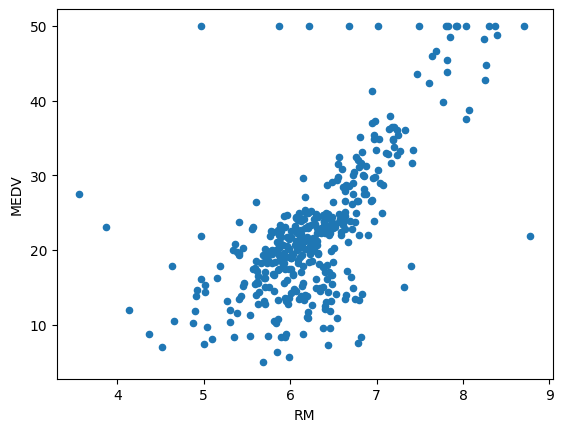

In [19]:
#let's now see only one graph out of the above scatter graph
housing.plot(kind="scatter", x= "RM", y="MEDV", alpha=1)

## Trying out Attributes combination

In [20]:
#for example we can merge tax attribute and rm(rooms) attribute to maek "tax per room" attribute
housing['TAXRM']= housing['TAX']/housing['RM']
#let's see the first 5 outputs
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [21]:
#now for this new data set(old+taxrm) let's find its correlation to MEDV
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680034
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525130
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

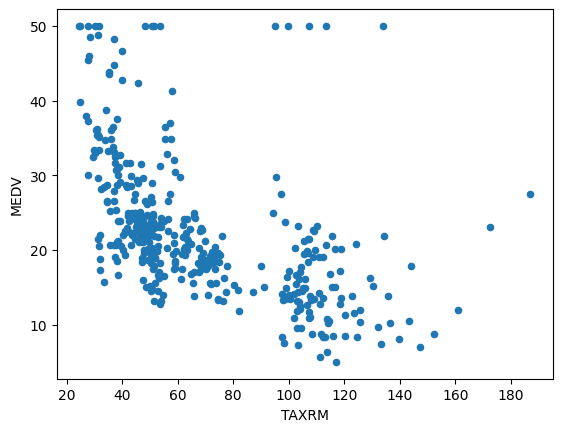

In [22]:
housing.plot(kind="scatter", x="TAXRM",y="MEDV", alpha=1)

#from the below graph we can see that TAXRM is a strong negative correlation to MEDV
#means MEDV more==>TAXMV less

## Missing attribute

we can do three things when we have missin attributes:
1. delete the missing values --> data.dropna(subset=["Attribute"]) 
2. delete the whole attribute --> data.drop(["Attribute"],axis=1)
3. assign value to the missing attribute as 0 or mean or median -->


 median = data['attribute'].median()



 data['attribute'].fillna(median)


## Scikit learn model

it has three objects : 
1. estimators
2. transform
3. prediction 

## Feature scaling

## IMPUTER

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)
imputer.statistics_
#here we got numpy array of 15 stats and these are the medians of each of our 15 attributes 
#impute will fill all the null values with median value as shown in the stats array

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21050000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.39474541e+01])

In [24]:
#as the fitting is done above, we now need to trasform the housing dataset to a new dataset that will have the imputed version(no null values dataset)
x = imputer.transform(housing)
housing_tr = pd.DataFrame(x,columns=housing.columns)
housing_tr.to_csv('imputed_data.csv')
housing_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9,51.571709
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,24.5,42.200452
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68,16.7,102.714374
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87,23.1,45.012547
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15,23.0,45.468948


in our housing data set we dont have any null values so even after fit-trasnform of housing inot housing_tr, we will not use
housing_tr because the train and test sets are stratified with the initial housing dataset. thus, for prediction we will use housing dataser only.
If in case the initial dataset has any null values, we can impute it by the below pipeline procedure. 

In [25]:
housing = strat_train_set.drop("MEDV",axis=1)
#doign this cuz medv is the lable meaning we need to predict medv
#now, housing == strat_train_set
housing_lable= strat_train_set["MEDV"].copy()
#housing_lable ==> lable 

## Pipelines

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
housing_num_tr = my_pipeline.fit_transform(housing)
#housing_lable --> lable

In [27]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

one thing to note here is that housing_num_tr is an numpy array while housing is a dataframe:

use housing : 
1. for testing example some_data


use housing_num_tr:
1. model fit( means we will train model on this data set) this is cuz models take only arrays as input 
2. because we train model on this data, we need to use this data to evaluate the model as well

In [28]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13


# Selecting a machine learning model to carry out this pedictive analysis 

# Linear regression

In [29]:
from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(housing_num_tr,housing_lable)

let us now try this model on a sample data called some_data from housing and its lables will be from housing_lables

In [30]:
# some_data = housing.iloc[:5]
# some_lables = housing_lable.iloc[:5]
# prepared_data = my_pipeline.transform(some_data)
# # model.predict(prepared_data)

In [31]:
# some_lables

## evaluation of the above linear regression model

In [32]:
# from sklearn.metrics import mean_squared_error
# import numpy as np
# house_prediction = model.predict(housing_num_tr)
# mse = mean_squared_error(housing_lable, house_prediction)
# root_of_mse = np.sqrt(mse)
# root_of_mse

this model si discarded because it has more mse so that means more error

## cross validation for linear regression

In [33]:
# from sklearn.model_selection import cross_val_score
# import numpy as np
# score = cross_val_score(model, housing_num_tr, housing_lable, scoring = "neg_mean_squared_error", cv=10)
# rmse_score = np.sqrt(-score)
# rmse_score

## score, mean and standard deviations for linear regression model

In [34]:
# import numpy as np
# def print_scores(score):
#     print("Scores: ", score)
#     print("mean: ", score.mean())
#     print("Standard deviation: ", score.std())
# print_scores(rmse_score)

# Decision tree regression and random forest

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_lable)

RandomForestRegressor()

let us now try this model on a sample data called some_data from housing and its lables will be from housing_lables

In [36]:
some_data = housing.iloc[:5]
some_lables = housing_lable.iloc[:5]
predicted_data = my_pipeline.transform(some_data)
model.predict(predicted_data)

array([22.353, 25.612, 16.371, 23.261, 23.611])

In [37]:
some_lables

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

## evaluate the above decision tree model and random forest

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np
house_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_lable, house_prediction)
root_of_mse = np.sqrt(mse)
root_of_mse

1.1617102512764488

now this is 0! does this mean our model is perfect, as it gives out 0 error ??? nahh...
this happened cuz of overfitting of traindata

# cross validation for the above decision tree model evaluation and random forest regressor

In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(model,housing_num_tr,housing_lable, scoring="neg_mean_squared_error", cv=10)
#using neg(negative) cuz cross validation works better that way
#but to find the roo mean square error we need to make the negative scores negative agan to make it positive 
#It splits the data into cv folds (10 in this case), trains the model on cv-1 folds, and tests it on the remaining fold. This process is repeated cv times, and the performance is averaged.
rmse_score = np.sqrt(-scores)
rmse_score

array([2.80388035, 2.7095767 , 4.42129698, 2.57858063, 3.55004172,
       2.58349243, 4.77531291, 3.27276901, 3.24942833, 3.11570161])

the above array is the real error in the decision tree model...this is why we perform cross validation in order to see the real error 

## score, mean and standard deviations for decision tree regression model and random forest regressor

In [40]:
import numpy as np
def print_scores(score):
    print("Scores: ", score)
    print("mean: ", score.mean())
    print("Standard deviation: ", score.std())
print_scores(rmse_score)

Scores:  [2.80388035 2.7095767  4.42129698 2.57858063 3.55004172 2.58349243
 4.77531291 3.27276901 3.24942833 3.11570161]
mean:  3.306008066193539
Standard deviation:  0.7184596919425469


with this we can see that RandomForestRegressor has lower values of mean thus it has less error. ths means randomforest is out chosen machne learning model that we will use for our price prediction

we have commented out the codes of linear regression and decision tree regression because our final model is decided to be 
the randomforest regression model

## saving model 

In [41]:
from joblib import dump, load
dump(model, 'REP_prediction.joblib')

['REP_prediction.joblib']

# Testing model on test data

In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np
X_test = strat_test_set.drop('MEDV',axis = 1)
y_test = strat_test_set['MEDV'].copy()
test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(test_prepared)
print(final_prediction)

[24.469 11.275 25.973 22.271 18.595 14.363 20.044 14.483 32.226 42.009
 19.479 11.342 24.743 27.076 19.491 11.334 31.422 14.369 23.702 18.754
 20.1   17.244 18.033 21.916 18.439 30.933 15.972 32.74   9.262 33.476
 23.922 20.765 23.033 10.974 21.378 10.781 42.931 24.544 23.473 41.575
 24.189 29.828 20.896 20.975 18.654 33.026 44.419 20.279 20.128 21.643
 20.813 14.461 21.628 15.004 25.284 32.726 42.164 29.358 18.936 20.897
 47.137  9.947 18.63  24.767 14.408 33.511 19.876 18.111 19.259 34.039
 26.119 22.759 21.345 22.227 34.185 12.838 15.695 19.91  20.669 21.401
 22.414 21.121 14.323 22.955 20.629 21.234 13.68  20.72  21.646 23.099
 18.574 27.38   7.165 26.056 19.149 29.027 19.773 31.939 14.279 27.408
 21.375 20.372]


In [43]:
print(list(y_test))

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]


## evaluate error

In [44]:
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

2.973786171882306

With this we can see the predicted value array and the real value array. As observed, there is not much difference in the actual and predicted data. 
Also, the evaluated mean squared error is pretty less ie, ~3

our model is ready for launch